# SYDE 556/750 --- Assignment 2
**Student ID: 20654471**

*Note:* Please include your numerical student ID only, do *not* include your name.

*Note:* Refer to the [PDF](https://github.com/tcstewar/syde556-f21/raw/master/assignments/assignment_02/syde556_assignment_02.pdf) for the full instructions (including some hints), this notebook contains abbreviated instructions only. Cells you need to fill out are marked with a "writing hand" symbol. Of course, you can add new cells in between the instructions, but please leave the instructions intact to facilitate marking.

In [1]:
# Import numpy and matplotlib -- you shouldn't need any other libraries
import numpy as np
import matplotlib.pyplot as plt

# Fix the numpy random seed for reproducible results
np.random.seed(18945)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Generating a random input signal

## 1.1 Band-limited white noise

**a) Time-domain signals.** Plot $x(t)$ for three randomly generated signals with $\texttt{limit}$ at $5$, $10$, and $20\,\mathrm{Hz}$. For each of these, $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$ and $\mathtt{rms}=0.5$.

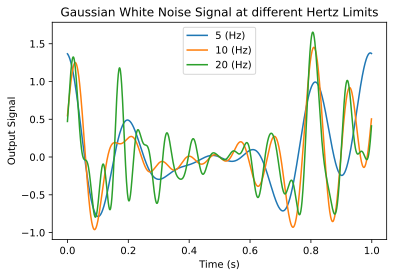

In [2]:
# ✍ 

def rootMeanSquaredList(list):
    return np.sqrt(np.mean(np.power(list,2)))


def generateRandomSignal(limit, T, dt, rms, seed = 18945, uniformOverGaussian = True):
    np.random.seed(seed)
    
    #set up x-axis to more over appropriate time period
    ts = np.arange(0,T,dt)
    numSamples = len(ts)
    #perform discrete fourier transform, these functions are SUPER helpful
    sampleFrequencies = np.fft.fftfreq(numSamples, dt)
#     print(sampleFrequencies)
    frequencySignal = np.zeros(len(sampleFrequencies)).tolist()
    
    if(uniformOverGaussian):
        for i in range(len(sampleFrequencies)):
            #impose frequency limit and skip filled values
            if(abs(sampleFrequencies[i]) <= limit and frequencySignal[i] == 0):
                realComponent = np.random.normal()
                imaginaryComponent = np.random.normal()
                frequencySignal[i] = complex(realComponent, imaginaryComponent)
                frequencySignal[len(frequencySignal)-(i+1)] = complex(realComponent, -imaginaryComponent)
                
    
    if(not uniformOverGaussian):
        #convert to radians - not 100% sure about this but I THINK it's correct
        bandwidth = limit*2*np.pi 
        #bandwidth = limit
        for i in range(len(sampleFrequencies)):
            standardDev = np.exp(-np.power(sampleFrequencies[i], 2)/(np.power(bandwidth, 2))*2)
            if(standardDev != 0 and frequencySignal[i] == 0):
                realComponent = np.random.normal(scale = standardDev)
                imaginaryComponent = np.random.normal(scale = standardDev)
                frequencySignal[i] = complex(realComponent, imaginaryComponent)
                frequencySignal[len(frequencySignal)-(i+1)] = complex(realComponent, -imaginaryComponent)
    
#     print(frequencySignal)            
    timeDomainSignal = np.fft.ifft(frequencySignal).real
    RMS = rootMeanSquaredList(timeDomainSignal)
    timeDomainSignal = timeDomainSignal*(rms/RMS)
    
    frequencySignal = np.fft.fft(timeDomainSignal)
    
    #This strategy which I found on stack overflow is SUPER helpful. Essentially it allows me to sort these 2 related lists
    #While keeping the indexes matched up 
    sampleFrequencies, frequencySignal = (list(t) for t in zip(*sorted(zip(sampleFrequencies,frequencySignal))))
    
    return sampleFrequencies, timeDomainSignal, frequencySignal
    
            
                
T = 1
dt = 0.001
rms = 0.5
ts = np.arange(0,T,dt)

limits = [5,10,20]
fig=plt.figure()
ax=fig.add_subplot()
ax.title.set_text('Gaussian White Noise Signal at different Hertz Limits')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Output Signal')
for limit in limits:
    sampleFrequencies, timeDomainSignal, frequencySignal = generateRandomSignal(limit, T,dt,rms)
    ax.plot(ts,timeDomainSignal, label ="%s (Hz)" % limit)
    legend=ax.legend()
    
    


**b) Average power spectrum.** Plot the average $|X(\omega)|$ (the norm of the Fourier coefficients, or “power spectrum”) over $100$ signals generated with $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=10\,\mathrm{Hz}$ (of course, each of these 100 signals should have a different `seed`). The plot should have the $x$-axis labeled “$\omega$ in radians” and the average $|X|$ value for that $\omega$ on the $y$-axis.

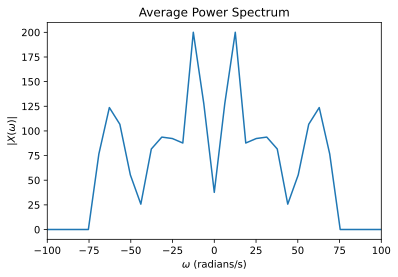

In [3]:
# ✍ 

numSignals = 100
total = 0
limit = 10
T = 1
dt = 0.001
rms = 0.5
t = np.arange(0,T,dt)
N = len(t) #samples
f = sorted(np.fft.fftfreq(N,dt))


genSig = []
for i in range(numSignals):
    sampleFrequencies, timeDomainSignal, frequencySignal = generateRandomSignal(limit, T,dt,rms, np.random.randint(0,100000))
    genSig.append(frequencySignal)

powerSpec = np.array(np.absolute(genSig[0]))

sampleRadians = []
for freq in f:
    sampleRadians.append(2*np.pi*freq)
averageXbars = total/numSignals


plt.plot(sampleRadians, powerSpec)
plt.title("Average Power Spectrum")
plt.xlabel("$\omega$ (radians/s)")
plt.ylabel("$|X(\omega)|$")
plt.xlim(-100, 100)
plt.show()
    
    


## 1.2 Gaussian power spectrum noise

**a) Time-domain signals.** Plot $x(t)$ for three randomly generated signals with `bandwidth` at $5$, $10$, and $20\,\mathrm{Hz}$. For each of these, $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$ and $\mathtt{rms}=0.5$.

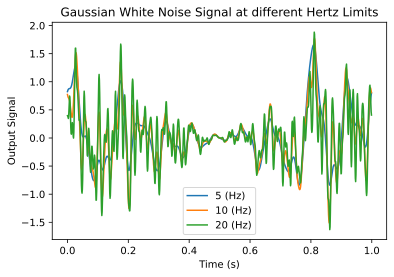

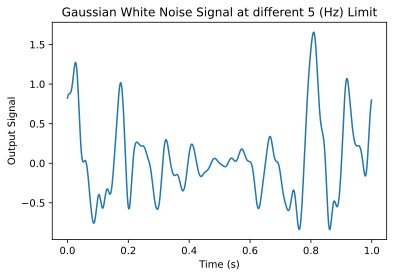

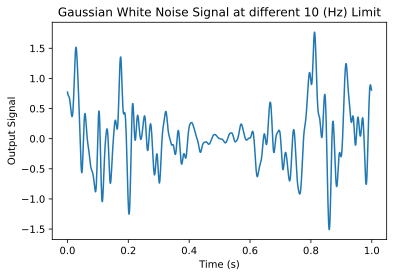

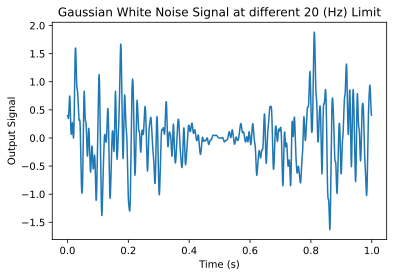

In [4]:
# ✍

T = 1
dt = 0.001
rms = 0.5
ts = np.arange(0,T,dt)

limits = [5,10,20]
fig=plt.figure()
ax=fig.add_subplot()
ax.title.set_text('Gaussian White Noise Signal at different Hertz Limits')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Output Signal')
for limit in limits:
    sampleFrequencies, timeDomainSignal, frequencySignal = generateRandomSignal(limit, T,dt,rms, uniformOverGaussian = False)
    ax.plot(ts,timeDomainSignal, label ="%s (Hz)" % limit)
    legend=ax.legend()

#Seems like this one needs 3 different plots for clarity
plt.figure()
for limit in limits:
    sampleFrequencies, timeDomainSignal, frequencySignal = generateRandomSignal(limit, T,dt,rms, uniformOverGaussian = False)
    plt.title('Gaussian White Noise Signal at different %s (Hz) Limit' % limit)
    plt.xlabel('Time (s)')
    plt.ylabel('Output Signal')
    plt.plot(ts,timeDomainSignal)
    plt.show()


**b) Average power spectrum.** Plot the average $|X(\omega)|$ (the norm of the Fourier coefficients, or “power spectrum”) over $100$ signals generated with $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{bandwidth}=10$ (of course, each of these 100 signals should have a different `seed`). The plot should have the $x$-axis labeled “$\omega$ in radians” and the average $|X|$ value for that $\omega$ on the $y$-axis.

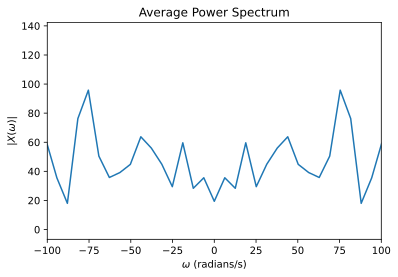

In [5]:
# ✍

numSignals = 100
total = 0
limit = 10
T = 1
dt = 0.001
rms = 0.5
t = np.arange(0,T,dt)
N = len(t) #samples
f = sorted(np.fft.fftfreq(N,dt))


genSig = []
for i in range(numSignals):
    sampleFrequencies, timeDomainSignal, frequencySignal = generateRandomSignal(limit, T,dt,rms, np.random.randint(0,100000), False)
    genSig.append(frequencySignal)
#     total += frequencyTransformed

powerSpec = np.array(np.absolute(genSig[0]))

sampleRadians = []
for freq in f:
    sampleRadians.append(2*np.pi*freq)
averageXbars = total/numSignals


plt.plot(sampleRadians, powerSpec)
plt.title("Average Power Spectrum")
plt.xlabel("$\omega$ (radians/s)")
plt.ylabel("$|X(\omega)|$")
plt.xlim(-100, 100)
plt.show()
    


# 2. Simulating a spiking neuron

**a) Spike plots for constant inputs.** Plot the spike output for a constant input of $x=0$ over $1$ second. Report the number of spikes. Do the same thing for $x=1$. Use a time step of $\Delta t = 1\,\mathrm{ms}$ for the simulation.

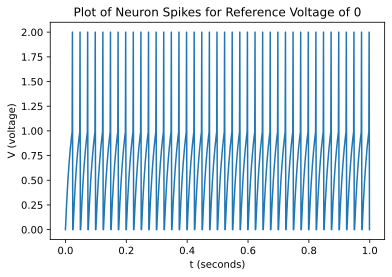

Num Spikes
40


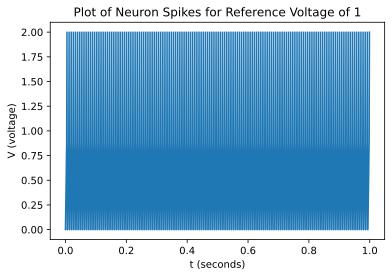

Num Spikes
143


In [6]:
# ✍ 

#class from previous assignment for inspiration 
# class LeakyIntegrateAndFireNeuronShell:
#      def __init__(self, aMax, zeta, encoder, tauRef, tauRC):
        
#         #preset values
#         self._aMax = aMax
#         self._zeta = zeta
#         self._encoder = encoder
#         self._tauRef = tauRef
#         self._tauRC = tauRC
        
#         #calculated values
#         self._alpha = (1/(1+self._zeta)*(1/(1-np.exp((self._aMax*self._tauRef -1)/(self._aMax*self._tauRC)))))
#         #print(self._alpha)
#         self._jBias = self._alpha*self._zeta
#         #print(self._jBias)




class SpikingNeuronShell:
    def __init__(self, minFireRate, maxFireRate, encoder, tauRef, tauRC):
        self.minFireRate = minFireRate
        self.maxFireRate = maxFireRate
        self.encoder = encoder
        self.tauRef = tauRef 
        self.tauRC = tauRC
        
        #from assignment 1 Q1.3 
        #self.alpha = (1/(1+self._zeta)*(1/(1-np.exp((self._aMax*self._tauRef -1)/(self._aMax*self._tauRC)))))
        #self.jBias = self._alpha*self._zeta 
        #Some weird math here, I think this is right
        #minFireRate occurs when self._zeta = 0 and max fire rate corresponds to when self._zeta = 1,-1
        self.jBias = 1/((1-np.exp((self.tauRef*self.minFireRate -1)/(self.minFireRate*self.tauRC))))
        self.alpha = 1/((1-np.exp((self.tauRef*self.maxFireRate -1)/(self.maxFireRate*self.tauRC)))) - self.jBias
        
        
    def simulateSpikes(self, x, dt):
        voltages = np.zeros(len(x))
        
        #to stop voltage from staying high the whole time
        #Kind of acts like a taboo list, I mean actually it's more just a counter, but I have taboo lists on the mind
        refractoryPeriod = int(self.tauRef/dt)
        refracting = 0
        
        for i in range(len(x) -1):
            #x[i] for variable stimuli
            voltageChange = dt*(1/(self.tauRC))*(self.alpha*x[i]*self.encoder + self.jBias - voltages[i])
            voltages[i+1] = voltages[i] + voltageChange
            
            if(voltages[i+1] < 0):
                voltages[i+1] = 0
            elif(refracting > 0):
                voltages[i+1] = 0
                refracting -= 1
            elif(voltages[i+1] >= 1):
                #SPIKE WOOT, fiddling with this value does some interesting stuff down the road
                #Simulating exceeding threshold then jumping to spiked value
                voltages[i+1] = 2
                refracting = refractoryPeriod
                
        
        return voltages
    
    def coreDerrivative(self, inputStimulus, y):
        return (1/(self.tauRC))*(self.alpha*inputStimulus*self.encoder + self.jBias - y)

    def RungeKutta4thOrder(self, inputStimulus, y0, stepSize):
        
        k1 = (self.coreDerrivative(inputStimulus, y0))
        k2 = (self.coreDerrivative((inputStimulus+stepSize/2), (y0+k1*stepSize/2)))
        k3 = (self.coreDerrivative((inputStimulus+stepSize/2), (y0+k2*stepSize/2)))
        k4 = (self.coreDerrivative((inputStimulus+stepSize), (y0+k3*stepSize)))
        k = (k1+2*k2+2*k3+k4)/6
        yn = y0 + k*stepSize
        
        return yn
    
    def simulateSpikesRungeKatta(self, x, dt):
        voltages = np.zeros(len(x))
        
        #to stop voltage from staying high the whole time
        #Kind of acts like a taboo list, I mean actually it's more just a counter, but I have taboo lists on the mind
        refractoryPeriod = int(self.tauRef/dt)
        refracting = 0
        
        for i in range(len(x) -1):
            #x[i] for variable stimuli
            voltages[i+1] = self.RungeKutta4thOrder(x[i], voltages[i], dt)
            if(voltages[i+1] < 0):
                voltages[i+1] = 0
            elif(refracting > 0):
                voltages[i+1] = 0
                refracting -= 1
            elif(voltages[i+1] >= 1):
                #SPIKE
                #Simulating exceeding threshold then jumping to spiked value
                voltages[i+1] = 2
                refracting = refractoryPeriod
        
        return voltages
    
    
neuron = SpikingNeuronShell(40, 150, 1, 0.002, 0.02)
T = 1
dt = 0.001
t = np.arange(0,T,dt)
Xzeros = np.zeros(int(T/dt))
Xones = np.ones(int(T/dt))
numSpikes = 0

voltages = neuron.simulateSpikes(Xzeros, dt)

for i in range(len(voltages)):
    if (voltages[i] >= 2):
        numSpikes += 1

plt.plot(t, voltages)
plt.title("Plot of Neuron Spikes for Reference Voltage of 0")
plt.xlabel("t (seconds)")
plt.ylabel("V (voltage)")
plt.show()
print("Num Spikes")
print(numSpikes)
                
    
voltages = neuron.simulateSpikes(Xones, dt)

# print(voltages)

numSpikes = 0
for i in range(len(voltages)):
    if (voltages[i] >= 2):
        numSpikes += 1

plt.plot(t, voltages)
plt.title("Plot of Neuron Spikes for Reference Voltage of 1")
plt.xlabel("t (seconds)")
plt.ylabel("V (voltage)")
plt.show()
print("Num Spikes")
print(numSpikes)
        
        
        



**b) Discussion.** Does the observed number of spikes in the previous part match the expected number of spikes for $x=0$ and $x=1$? Why or why not? What aspects of the simulation would affect this accuracy?

✍ 
The observed number of spikes makes perfect sense in the 40 (Hz) case (i.e. the case where our input voltage is 0, which alligns with our min fire rate case of 40(Hz)). In this situation we observe exactly 40 spikes, which (somewhat obviously) alligns with our input parameters. However, somewhat strangely, when we oberseve the higher input stimulus case (i.e. when we use an input voltage of 1 for the duration), we only get 143 spikes. This is strange because for our model, an input stimulus of 1 SHOULD correspond to our max firing rate of 150 (Hz), however it falls short. After conducting some experimentation, I believe that this is primarily explained by the width of our timestep. This issue reminds me (because I am taking an analog and digital controls course at the moment) of the data loss that can result from a refresh rate that is too low. Specifically in this case we can assume that you occasionally would have gotten 2 spikes in one period dt, but instead those seperate spikes were melded into 1. We can confirm this hypothesis by decreasing the size of our steps dt. Dividng the step size by 5 results in 147 spikes, and dividing by 1000 results in the full 150 spikes. Likewise, doubling the size of dt results in only 124 spikes. Thus, the step size is clearly an important aspect of our simulation. 

This behaviour also plays out in Eurler's method (and similar functions) being more accurate the smaller your step size is. 

One other interesting quirk of the above code, is that if you set the max firing rate to 166 then 166 spikes will occur, but if you set it between 166 and 199 that number will not increase, until at 200 it will jump again to 200 spikes. While this behaviour is strange, I am PRETTY sure it has to do with the way that code is rounding values, rather than being some innate byproduct of our model. Not sure though, will try to investigate more if I have time before handing this in. 

**c) Spike plots for white noise inputs.** Plot the spike output for $x(t)$ generated using your function from part 1.1. Use $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=30\,\mathrm{Hz}$. Overlay on this plot $x(t)$.

Num Spikes
48


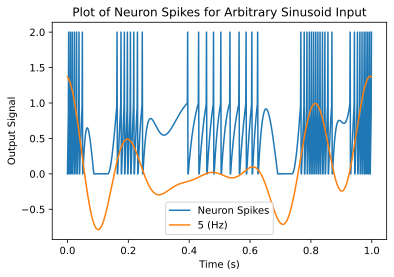

In [7]:
# ✍ 
T = 1
dt = 0.001
rms = 0.5
ts = np.arange(0,T,dt)
limit = 5

sampleFrequencies, timeDomainSignal, frequencySignal = generateRandomSignal(limit, T,dt,rms)



voltages = neuron.simulateSpikes(timeDomainSignal, dt)

# print(voltages)

numSpikes = 0
for i in range(len(voltages)):
    if (voltages[i] >= 2):
        numSpikes += 1



fig=plt.figure()
ax=fig.add_subplot()
ax.title.set_text('Plot of Neuron Spikes for Arbitrary Sinusoid Input')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Output Signal')
ax.plot(t, voltages, label = "Neuron Spikes")
ax.plot(ts,timeDomainSignal, label ="%s (Hz)" % limit)
legend=ax.legend()
print("Num Spikes")
print(numSpikes)





**d) Voltage over time.** Using the same $x(t)$ signal as in part *c)*, plot the neuron's voltage over time for the first $0.2$ seconds, along with the spikes over the same time.

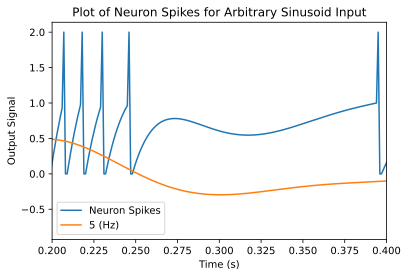

In [8]:
# ✍ 
fig=plt.figure()
ax=fig.add_subplot()
ax.title.set_text('Plot of Neuron Spikes for Arbitrary Sinusoid Input')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Output Signal')
ax.plot(t, voltages, label = "Neuron Spikes")
ax.plot(ts,timeDomainSignal, label ="%s (Hz)" % limit)
ax.set_xlim(0.2,0.4)
legend=ax.legend()


**e) 🌟 Bonus question.** How could you improve this simulation (in terms of how closely the model matches actual equation) without significantly increasing the computation time? $0.5$ marks for having a good idea. Up to $1$ mark for actually implementing it and showing that it works.

✍ In order to improve the model without adding significant computation time I have implemented a Runge-Katta method to replace euler's method. This SHOULD make the model more accurate by better approximating the voltage that the Leaky-Integrate Fire Neuron sees at any given time, thus improving the accuracy of the spiking times. The code implementation itself can be found in my SpikingNeuronShell class in section 2a) under the function name: simulateSpikesEfficient

The below graphs are meant to illustrate that there is in fact a different between the neuron spike graphs with these two seperate implementations... In terms of PROVING that the Runge-Katta method is actually better, I am not entirely sure how to do that, but my numerical methods course taught me that it was and google seems to confirm, so hopefully that is good enough 

Num Spikes
48


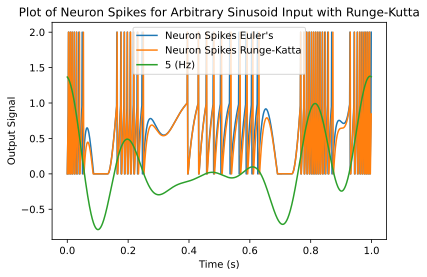

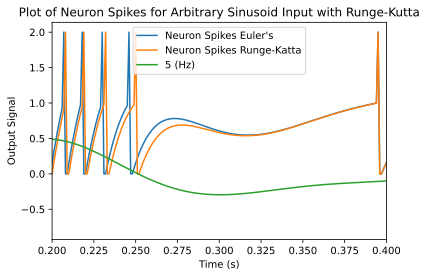

In [9]:
# ✍ 

T = 1
dt = 0.001
rms = 0.5
ts = np.arange(0,T,dt)
limit = 5

sampleFrequencies, timeDomainSignal, frequencySignal = generateRandomSignal(limit, T,dt,rms)



voltages1 = neuron.simulateSpikes(timeDomainSignal, dt)
voltages2 = neuron.simulateSpikesRungeKatta(timeDomainSignal, dt)

# print(voltages)

numSpikes = 0
for i in range(len(voltages)):
    if (voltages[i] >= 2):
        numSpikes += 1



fig=plt.figure()
ax=fig.add_subplot()
ax.title.set_text('Plot of Neuron Spikes for Arbitrary Sinusoid Input with Runge-Kutta')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Output Signal')
ax.plot(t, voltages1, label = "Neuron Spikes Euler's")
ax.plot(t, voltages2, label = "Neuron Spikes Runge-Katta")
ax.plot(ts,timeDomainSignal, label ="%s (Hz)" % limit)
legend=ax.legend()
print("Num Spikes")
print(numSpikes)

fig=plt.figure()
ax=fig.add_subplot()
ax.title.set_text('Plot of Neuron Spikes for Arbitrary Sinusoid Input with Runge-Kutta')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Output Signal')
ax.plot(t, voltages1, label = "Neuron Spikes Euler's")
ax.plot(t, voltages2, label = "Neuron Spikes Runge-Katta")
ax.plot(ts,timeDomainSignal, label ="%s (Hz)" % limit)
ax.set_xlim(0.2,0.4)
legend=ax.legend()

# 3. Simulating two spiking neurons

**a) Spike plots for constant inputs.** Plot $x(t)$ and the spiking output for $x(t)=0$ (both neurons should spike at about $40$ spikes per second), as well as (in a separate plot) $x(t)=1$ (one neuron should spike at $\approx 150$ spikes per second, and the other should not spike at all).

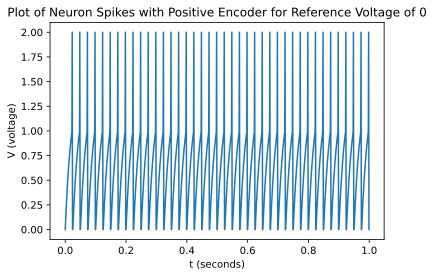

Num Spikes Per Second
40


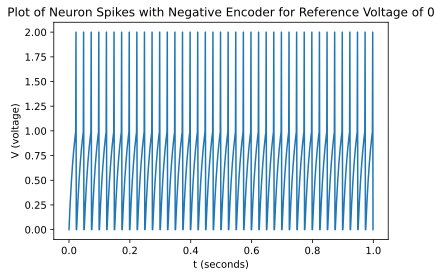

Num Spikes Per Second
40


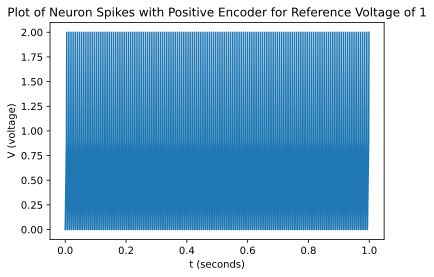

Num Spikes Per Second
143


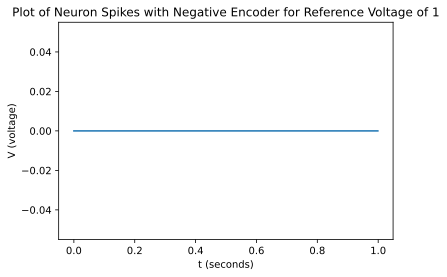

Num Spikes Per Second
0


In [10]:
# ✍ 

neuron1 = SpikingNeuronShell(40, 150, 1, 0.002, 0.02)
neuron2 = SpikingNeuronShell(40, 150, -1, 0.002, 0.02)
T = 1
dt = 0.001
t = np.arange(0,T,dt)
Xzeros = np.zeros(int(T/dt))
Xones = np.ones(int(T/dt))

#Positive Encoder

voltages = neuron1.simulateSpikes(Xzeros, dt)

numSpikes = 0
for i in range(len(voltages)):
    if (voltages[i] >= 2):
        numSpikes += 1

plt.plot(t, voltages)
plt.title("Plot of Neuron Spikes with Positive Encoder for Reference Voltage of 0")
plt.xlabel("t (seconds)")
plt.ylabel("V (voltage)")
plt.show()
print("Num Spikes Per Second")
print(numSpikes)

#Negative Encoder

voltages = neuron2.simulateSpikes(Xzeros, dt)

numSpikes = 0
for i in range(len(voltages)):
    if (voltages[i] >= 2):
        numSpikes += 1

plt.plot(t, voltages)
plt.title("Plot of Neuron Spikes with Negative Encoder for Reference Voltage of 0")
plt.xlabel("t (seconds)")
plt.ylabel("V (voltage)")
plt.show()
print("Num Spikes Per Second")
print(numSpikes)
                

    
#Positive Encoder    

voltages = neuron1.simulateSpikes(Xones, dt)

numSpikes = 0
for i in range(len(voltages)):
    if (voltages[i] >= 2):
        numSpikes += 1

plt.plot(t, voltages)
plt.title("Plot of Neuron Spikes with Positive Encoder for Reference Voltage of 1")
plt.xlabel("t (seconds)")
plt.ylabel("V (voltage)")
plt.show()
print("Num Spikes Per Second")
print(numSpikes)


#Negative Encoder

voltages = neuron2.simulateSpikes(Xones, dt)

numSpikes = 0
for i in range(len(voltages)):
    if (voltages[i] >= 2):
        numSpikes += 1

plt.plot(t, voltages)
plt.title("Plot of Neuron Spikes with Negative Encoder for Reference Voltage of 1")
plt.xlabel("t (seconds)")
plt.ylabel("V (voltage)")
plt.show()
print("Num Spikes Per Second")
print(numSpikes)
        
        
        


**b) Spike plots for a sinusodial input.** Plot $x(t)$ and the spiking output for $x(t)=\frac{1}2 \sin(10 \pi t)$.

Num Spikes Per Second for Positive Encoder
40
Num Spikes Per Second for Negative Encoder
40


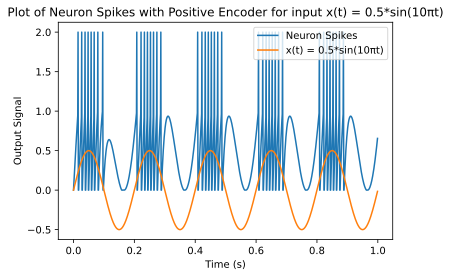

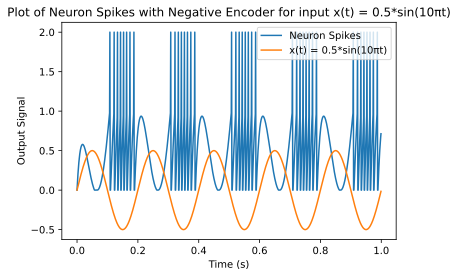

In [11]:
# ✍ 
#Positive Encoder

neuron1 = SpikingNeuronShell(40, 150, 1, 0.002, 0.02)
neuron2 = SpikingNeuronShell(40, 150, -1, 0.002, 0.02)
T = 1
dt = 0.001
t = np.arange(0,T,dt)
Xzeros = np.zeros(int(T/dt))
Xones = np.ones(int(T/dt))

xFunc = 0.5*np.sin(10*np.pi*t)


voltages = neuron1.simulateSpikes(xFunc, dt)

numSpikes = 0
for i in range(len(voltages)):
    if (voltages[i] >= 2):
        numSpikes += 1

        
fig=plt.figure()
ax=fig.add_subplot()
ax.title.set_text('Plot of Neuron Spikes with Positive Encoder for input x(t) = 0.5*sin(10πt)')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Output Signal')
ax.plot(t, voltages, label = "Neuron Spikes")
ax.plot(t,xFunc, label ="x(t) = 0.5*sin(10πt)")
legend=ax.legend()        

print("Num Spikes Per Second for Positive Encoder")
print(numSpikes)

#Negative Encoder

voltages = neuron2.simulateSpikes(xFunc, dt)

numSpikes = 0
for i in range(len(voltages)):
    if (voltages[i] >= 2):
        numSpikes += 1

fig=plt.figure()
ax=fig.add_subplot()
ax.title.set_text('Plot of Neuron Spikes with Negative Encoder for input x(t) = 0.5*sin(10πt)')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Output Signal')
ax.plot(t, voltages, label = "Neuron Spikes")
ax.plot(t,xFunc, label ="x(t) = 0.5*sin(10πt)")
legend=ax.legend()     
print("Num Spikes Per Second for Negative Encoder")
print(numSpikes)

**c) Spike plot for a white noise signal.** Plot $x(t)$ and the spiking output for a random signal generated with your function for question 1.1 with $\mathtt{T}=2\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=5\,\mathrm{Hz}$.

Num Spikes Per Second for Positive Encoder
93
Num Spikes Per Second for Negative Encoder
86


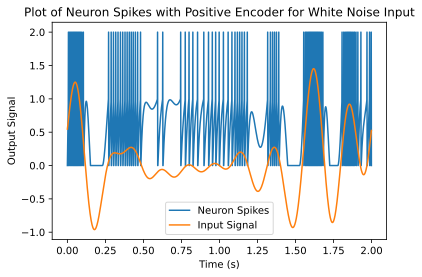

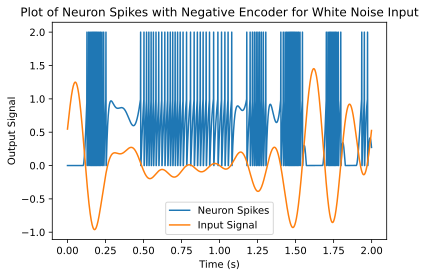

In [12]:
# ✍ 

neuron1 = SpikingNeuronShell(40, 150, 1, 0.002, 0.02)
neuron2 = SpikingNeuronShell(40, 150, -1, 0.002, 0.02)
T = 2
dt = 0.001
limit = 5
rms =0.5
t = np.arange(0,T,dt)
Xzeros = np.zeros(int(T/dt))
Xones = np.ones(int(T/dt))

sampleFrequencies, timeDomainSignal, frequencySignal = generateRandomSignal(limit, T,dt,rms)


voltages = neuron1.simulateSpikes(timeDomainSignal, dt)

numSpikes = 0
for i in range(len(voltages)):
    if (voltages[i] >= 2):
        numSpikes += 1

        
fig=plt.figure()
ax=fig.add_subplot()
ax.title.set_text('Plot of Neuron Spikes with Positive Encoder for White Noise Input')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Output Signal')
ax.plot(t, voltages, label = "Neuron Spikes")
ax.plot(t,timeDomainSignal, label ="Input Signal")
legend=ax.legend()        

print("Num Spikes Per Second for Positive Encoder")
print(numSpikes)

#Negative Encoder

voltages = neuron2.simulateSpikes(timeDomainSignal, dt)

numSpikes = 0
for i in range(len(voltages)):
    if (voltages[i] >= 2):
        numSpikes += 1

fig=plt.figure()
ax=fig.add_subplot()
ax.title.set_text('Plot of Neuron Spikes with Negative Encoder for White Noise Input')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Output Signal')
ax.plot(t, voltages, label = "Neuron Spikes")
ax.plot(t,timeDomainSignal, label ="Input Signal")
legend=ax.legend()     
print("Num Spikes Per Second for Negative Encoder")
print(numSpikes)

# 4. Computing an optimal filter

**a) Document the code.** Fill in comments where there are `# !`-signs in the Python code. Make sure that your comments (where this makes sense) describe the semantics of the code and do not just repeat what is obvious from the code itself. Run the function with what you wrote for part 3 above, so that it uses the spike signal generated in 3c).

In [13]:
#I admittedly become less and less confident with the answers as I move down this function, but things mostly seem to add up
#until near the end where I think I lost the train

def compute_optimal_filter(
        # Signal generated from your white noise generator
        x,
        # Fourier coefficients from your white noise generator
        X,
        # Spike train from the previous part
        spikes,
        # Time step size
        dt=1e-3
    ):

    # x and X should (effectively) be 1D-arrays
    assert x.ndim == 1 and X.ndim == 1
    assert x.shape[0] == X.shape[0]

    # ! Nt here represents the number of time samples and is generated based on the length of our white noise signal
    # Length in this case refers to the number of measurements taken of the signal not neccesarily the amount of time it takes
    Nt = x.size

    # Make sure that "spikes" is a 2 x Nt array
    assert spikes.ndim == 2
    assert spikes.shape[0] == 2              
    assert spikes.shape[1] == Nt

    # ! Since Nt is the number of time samples and dt is the step size, T here represents the actual legnth of the signal 
    # in time (seconds)
    T = Nt * dt

    # ! The first half of this statement (np.arange(Nt) *dt) makes an array of actual time values so that we have an array 
    # going from 0 to our period length T, moving up by an increment of dt each time. The next part of the equation (-T/2.0)
    # seems to substract half of the period value from every element in the array... This basically results in the array
    # ranging from -T/2 to T/2 rather than from 0 to T, I'm not yet sure why we want to do that... OHHHHH I get it, this is to 
    # cut off half of our spike
    ts = np.arange(Nt) * dt - T / 2.0

    # ! This statement generates our frequency values and then uses a tactic similar to the above line to center the range 
    # of these values at 0 
    fs = np.arange(Nt) / T - Nt / (2.0 * T)

    # ! Simple conversion of the frequency range to radians (from Hz)
    omega = fs * 2.0 * np.pi

    # ! The value of r will be 0 if these values are the same, and either 1 or -1 if they are different... Thinking about the
    # neurological representation here, that basically means for the neurons in the example above (3c), we can see all the 
    # spikes that a pair of positively and negatively encoded neurons would output for a given signal, kind of like combining
    # the two graphs together (and we can differentiate between which neuron provides which spikes)
    r = spikes[0] - spikes[1]

    # ! Translates r, which is the combined response of our neurons, into the frequency domain and centers the zero frequency
    # components 
    R = np.fft.fftshift(np.fft.fft(r))

    # ! Setting a (notably small) standard deviation  
    sigma_t = 25e-3

    # ! Calculates gaussian filter over our radian converted frequencies with our set standard deviation
    W2 = np.exp(-omega**2*sigma_t**2)

    # ! Normalizes filter values by dividing by the sum so that they all act as a percentage, not yet entirely sure what the 
    # purpose of this step is
    W2 = W2 / sum(W2)

    # ! Returns the complex conjugate of the response of the neurons multiplied by the forier coefficients of the white 
    # noise signal
    CP = X*R.conjugate()

    # ! A bit over my head again, but this seems to return the convolution of the above term with the normalized filter values
    # in an effort to make the filter more accurate? 
    WCP = np.convolve(CP, W2, 'same')

    # ! So, multiplying a complex number by it's conjugate returns a non-negative real number which is the product of the
    # squares of both the real and imaginary parts of the orginal number
    RP = R*R.conjugate()

    # ! So again I guess this is trying to improve the accuracy of the filter by convolving our gaussian filter with whatever
    # RP is supposed to represent (kind of looks like a power spectrum? so like a power spectrum of neuron signals? Does that
    # make any sense?)
    WRP = np.convolve(RP, W2, 'same')

    # ! That would mean that this is the power spectrum of the input signal? That or I have gone down a bad path
    XP = X*X.conjugate()

    # ! Soooo another of these convolutions that I don't REALLY understand. This obviously applies the gaussian to our input
    # signal power spectrum, because reasons
    WXP = np.convolve(XP, W2, 'same')

    # ! I think this is supposed to now be our final "optimal" filter (not sure why I have optimal in quotes, I just don't)
    # totally understand... Very interesting though
    H = (WCP / WRP)

    # ! Okay, this brings H into the time domain!
    h = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(H))).real

    # ! So this is the filter multiplied by the neurons responses which I guess is supposed to estimate the filtered
    # signal given these inputs and our newly created filter?
    XHAT = H*R

    # ! Then this would be the same as the above but in the time instead of frequency domain
    xhat = np.fft.ifft(np.fft.ifftshift(XHAT)).real

    return ts, fs, R, H, h, XHAT, xhat, XP, WXP

**b) Optimal filter.** Plot the time and frequency plots of the optimal filter for the signal you generated in question 3c). Make sure to use appropriate limits for the $x$-axis.

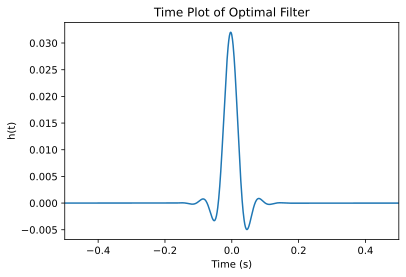

(-75.0, 75.0)

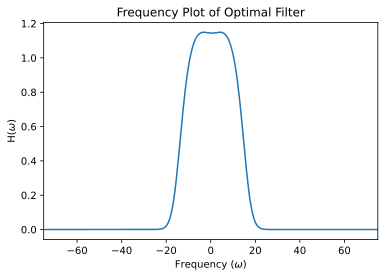

In [14]:
# ✍ 
neuron1 = SpikingNeuronShell(40, 150, 1, 0.002, 0.02)
neuron2 = SpikingNeuronShell(40, 150, -1, 0.002, 0.02)
T = 2
dt = 0.001
rms = 0.5
ts = np.arange(0,T,dt)
limit = 5
Xzeros = np.zeros(int(T/dt))
Xones = np.ones(int(T/dt))

sampleFrequencies, timeDomainSignal, frequencySignal = generateRandomSignal(limit, T,dt,rms)


voltages1 = neuron1.simulateSpikes(timeDomainSignal, dt)
voltages2 = neuron2.simulateSpikes(timeDomainSignal, dt)

numSpikes1 = 0
spikeTrain1 = np.zeros(len(voltages1))
for i in range(len(voltages1)):
    if (voltages1[i] >= 2):
        numSpikes1 += 1
        spikeTrain1[i] = 1
        
        
numSpikes2 = 0
spikeTrain2 = np.zeros(len(voltages2))
for i in range(len(voltages2)):
    if (voltages2[i] >= 2):
        numSpikes2 += 1
        spikeTrain2[i] = 1

#type casting to arrays to work with above optimal filter function
voltages = np.array(list(zip(voltages1, voltages2)))
voltages = np.array(voltages.T)
timeDomainSignal = np.array(timeDomainSignal)
frequencySignal = np.array(frequencySignal)


ts, fs, R, H, h, XHAT, xhat, XP, WXP = compute_optimal_filter(timeDomainSignal, frequencySignal, voltages)

plt.figure()
plt.title('Time Plot of Optimal Filter')
plt.xlabel('Time (s)')
plt.ylabel('h(t)')
plt.plot(ts, h)
plt.xlim(-0.5,0.5)
plt.show()


plt.figure()
plt.title('Frequency Plot of Optimal Filter')
plt.xlabel('Frequency ($\omega$)')
plt.ylabel('H($\omega$)')
plt.plot(fs, H.real) 
plt.xlim(-75,75)



**c) Decoded signal.** Plot the $x(t)$ signal, the spikes, and the decoded $\hat x(t)$ value for the signal from 3c).

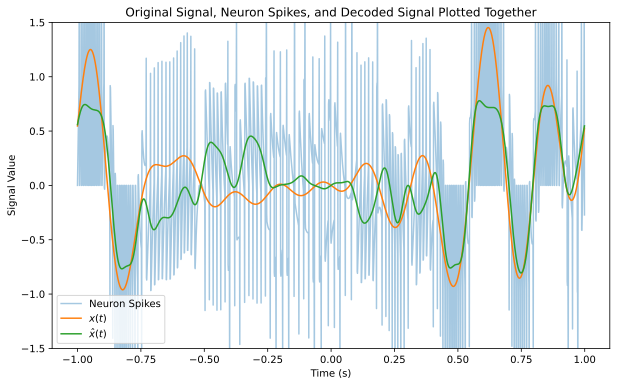

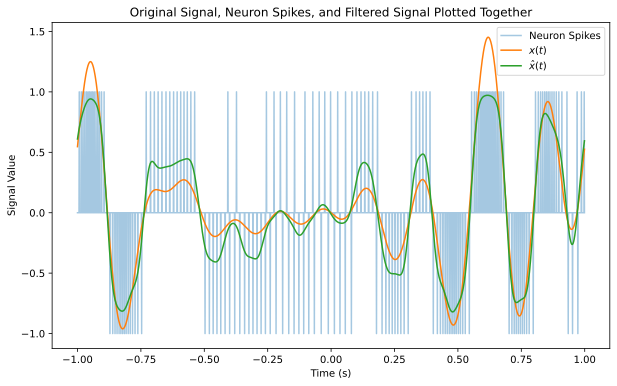

In [15]:
# ✍ 
neuron1 = SpikingNeuronShell(40, 150, 1, 0.002, 0.02)
neuron2 = SpikingNeuronShell(40, 150, -1, 0.002, 0.02)
T = 2
dt = 0.001
t = np.arange(0,T,dt)
Xzeros = np.zeros(int(T/dt))
Xones = np.ones(int(T/dt))

sampleFrequencies, timeDomainSignal, frequencySignal = generateRandomSignal(limit, T,dt,rms)


voltages1 = neuron1.simulateSpikes(timeDomainSignal, dt)
voltages2 = neuron2.simulateSpikes(timeDomainSignal, dt)

numSpikes1 = 0
spikeTrain1 = np.zeros(len(voltages1))
for i in range(len(voltages1)):
    if (voltages1[i] >= 2):
        numSpikes1 += 1
        spikeTrain1[i] = 1
        
        
numSpikes2 = 0
spikeTrain2 = np.zeros(len(voltages2))
for i in range(len(voltages2)):
    if (voltages2[i] >= 2):
        numSpikes2 += 1
        spikeTrain2[i] = 1

#type casting to arrays to work with above optimal filter function
voltages = np.array(list(zip(voltages1, voltages2)))
voltages = np.array(voltages.T)
spikes = np.array(list(zip(spikeTrain1, spikeTrain2)))
spikes = np.array(spikes.T)
timeDomainSignal = np.array(timeDomainSignal)
frequencySignal = np.array(frequencySignal)

voltagesGraph = voltages1 - voltages2
spikesGraph = spikeTrain1 - spikeTrain2


ts, fs, R, H, h, XHAT, xhat, XP, WXP = compute_optimal_filter(timeDomainSignal, frequencySignal, voltages)

#Plot using actual voltage values to represent spikes
fig=plt.figure(figsize = (10,6))
ax=fig.add_subplot()
ax.title.set_text('Original Signal, Neuron Spikes, and Decoded Signal Plotted Together')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal Value')
#alphs value so that graph is a little less cluttered looking
ax.plot(ts, voltagesGraph, label = "Neuron Spikes", alpha = 0.4)
ax.plot(ts,timeDomainSignal, label ="$x(t)$")
ax.plot(ts,xhat, label ="$\hat{x}(t)$")
ax.set_ylim(-1.5,1.5)
legend=ax.legend()     


ts, fs, R, H, h, XHAT, xhat, XP, WXP = compute_optimal_filter(timeDomainSignal, frequencySignal, spikes)

#Plot using simplified spike values to represent spikes. This second one looks a lot better and is the one I think the
# question is asking for, but it's interesting to see the differences. Somewhat sensibly, if I change my voltage spike value
# in my oringal neuron to a much higher value (better approximation of what happens in nature) the above graph that uses 
# voltages directly starts to look almost identical to my spike only graph. This obviously makes sense as we avoid destructive
# interference actually impacting the spikes because they are sooo much larger than the unspiked voltages
fig=plt.figure(figsize = (10,6))
ax=fig.add_subplot()
ax.title.set_text('Original Signal, Neuron Spikes, and Filtered Signal Plotted Together')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Signal Value')
ax.plot(ts, spikesGraph, label = "Neuron Spikes", alpha = 0.4)
ax.plot(ts,timeDomainSignal, label ="$x(t)$")
ax.plot(ts,xhat, label ="$\hat{x}(t)$")
legend=ax.legend()     



**d) Power spectra.** Plot the signal $|X(\omega)|$, spike response $|R(\omega)|$, and filtered signal $|\hat X(\omega)|$ power spectra for the signal from 3c).

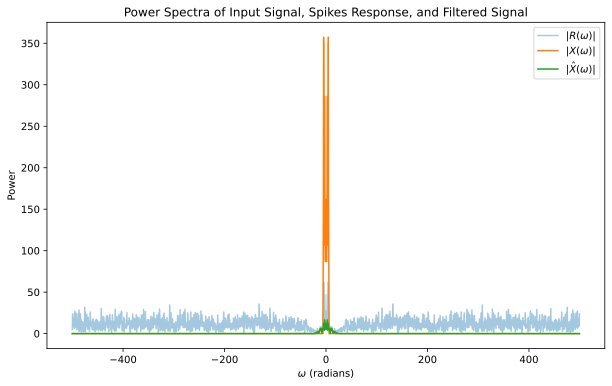

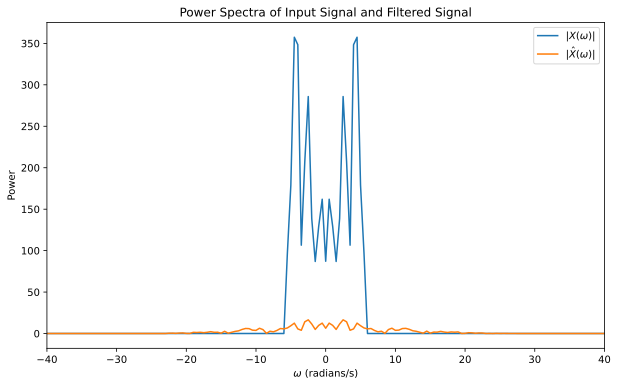

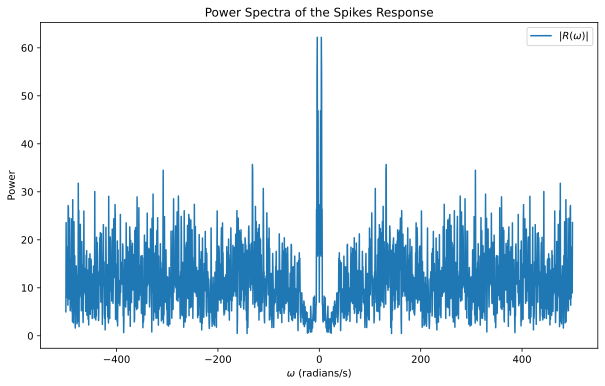

In [16]:
# ✍
neuron1 = SpikingNeuronShell(40, 150, 1, 0.002, 0.02)
neuron2 = SpikingNeuronShell(40, 150, -1, 0.002, 0.02)
T = 2
dt = 0.001
limit = 5
t = np.arange(0,T,dt)
Xzeros = np.zeros(int(T/dt))
Xones = np.ones(int(T/dt))

sampleFrequencies, timeDomainSignal, frequencySignal = generateRandomSignal(limit, T,dt,rms)


voltages1 = neuron1.simulateSpikes(timeDomainSignal, dt)
voltages2 = neuron2.simulateSpikes(timeDomainSignal, dt)

numSpikes1 = 0
spikeTrain1 = np.zeros(len(voltages1))
for i in range(len(voltages1)):
    if (voltages1[i] >= 2):
        numSpikes1 += 1
        spikeTrain1[i] = 1
        
        
numSpikes2 = 0
spikeTrain2 = np.zeros(len(voltages2))
for i in range(len(voltages2)):
    if (voltages2[i] >= 2):
        numSpikes2 += 1
        spikeTrain2[i] = 1

#type casting to arrays to work with above optimal filter function
spikes = np.array(list(zip(spikeTrain1, spikeTrain2)))
spikes = np.array(spikes.T)
timeDomainSignal = np.array(timeDomainSignal)
frequencySignal = np.array(frequencySignal)

spikesGraph = spikeTrain1 - spikeTrain2


ts, fs, R, H, h, XHAT, xhat, XP, WXP = compute_optimal_filter(timeDomainSignal, frequencySignal, spikes)

#Plot using actual voltage values to represent spikes
fig=plt.figure(figsize = (10,6))
ax=fig.add_subplot()
ax.title.set_text('Power Spectra of Input Signal, Spikes Response, and Filtered Signal')
ax.set_xlabel('$\omega$ (radians)')
ax.set_ylabel('Power')
#alphs value so that graph is a little less cluttered looking
ax.plot(fs, np.sqrt(R*R.conjugate()).real, label = "$|R(\omega)|$", alpha = 0.4)
ax.plot(fs,np.sqrt(XP).real, label ="$|X(\omega)|$")
ax.plot(fs,np.sqrt(XHAT).real, label ="$|\hat{X}(\omega)|$")
legend=ax.legend() 

#Maybe put these in different Graphs

fig=plt.figure(figsize = (10,6))
ax=fig.add_subplot()
ax.title.set_text('Power Spectra of Input Signal and Filtered Signal')
ax.set_xlabel('$\omega$ (radians/s)')
ax.set_ylabel('Power')
ax.set_xlim(-40,40)
#alphs value so that graph is a little less cluttered looking
ax.plot(fs,np.sqrt(XP).real, label ="$|X(\omega)|$")
ax.plot(fs,np.sqrt(XHAT).real, label ="$|\hat{X}(\omega)|$")
legend=ax.legend() 


fig=plt.figure(figsize = (10,6))
ax=fig.add_subplot()
ax.title.set_text('Power Spectra of the Spikes Response')
ax.set_xlabel('$\omega$ (radians/s)')
ax.set_ylabel('Power')
#alphs value so that graph is a little less cluttered looking
ax.plot(fs, np.sqrt(R*R.conjugate()).real, label = "$|R(\omega)|$")
legend=ax.legend() 

**e) Discussion.** How do these spectra relate to the optimal filter?

✍ $|X(\omega)|$ is the power spectrum of the input signal and I think has no impact on the filter at all, although the actual input signal $X(\omega)$ is used to create the filter. $|\hat{X}(\omega)|$ on the other hand is the product of the frequency domain filter multiplied by the Neuron responses in the frequency domain. Speaking of the neruon inputs, $|R(\omega)|$ is the power spectra of the neuron responses. 

The optimal filter is also defined relative to these power spectra in the notes as: 

$$|H(\omega)| = \dfrac{|X(\omega)| |R^*(\omega)| * W(\omega)}{|R(\omega)|^2 * W(\omega)}$$


**f) Filter for different signal bandwidths.** Plot the optmial filter $h(t)$ in the time domain when filtering spike trains for white noise signals with different `limit` values of $2\,\mathrm{Hz}$, $10\,\mathrm{Hz}$, and $30\,\mathrm{Hz}$.

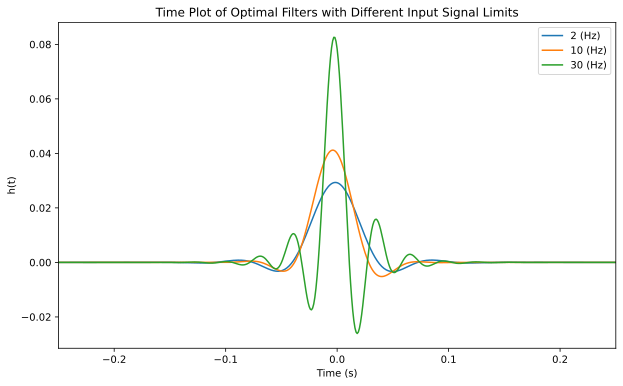

In [17]:
# ✍ 


neuron1 = SpikingNeuronShell(40, 150, 1, 0.002, 0.02)
neuron2 = SpikingNeuronShell(40, 150, -1, 0.002, 0.02)
T = 2
dt = 0.001
rms = 0.5
ts = np.arange(0,T,dt)
limits = [2,10,30]
Xzeros = np.zeros(int(T/dt))
Xones = np.ones(int(T/dt))

hs = []

for i in range(len(limits)):
    sampleFrequencies, timeDomainSignal, frequencySignal = generateRandomSignal(limits[i], T,dt,rms)

    voltages1 = neuron1.simulateSpikes(timeDomainSignal, dt)
    voltages2 = neuron2.simulateSpikes(timeDomainSignal, dt)

    numSpikes1 = 0
    spikeTrain1 = np.zeros(len(voltages1))
    for i in range(len(voltages1)):
        if (voltages1[i] >= 2):
            numSpikes1 += 1
            spikeTrain1[i] = 1


    numSpikes2 = 0
    spikeTrain2 = np.zeros(len(voltages2))
    for i in range(len(voltages2)):
        if (voltages2[i] >= 2):
            numSpikes2 += 1
            spikeTrain2[i] = 1

    #type casting to arrays to work with above optimal filter function
    voltages = np.array(list(zip(voltages1, voltages2)))
    voltages = np.array(voltages.T)
    timeDomainSignal = np.array(timeDomainSignal)
    frequencySignal = np.array(frequencySignal)


    ts, fs, R, H, h, XHAT, xhat, XP, WXP = compute_optimal_filter(timeDomainSignal, frequencySignal, voltages)
    
    hs.append(h)

fig=plt.figure(figsize = (10,6))
ax=fig.add_subplot()
ax.title.set_text('Time Plot of Optimal Filters with Different Input Signal Limits')
ax.set_xlabel('Time (s)')
ax.set_ylabel('h(t)')
ax.set_xlim(-0.25,0.25)
for i in range(len(limits)):
    #alphs value so that graph is a little less cluttered looking
    ax.plot(ts,hs[i], label ="%s (Hz)" % limits[i])
    legend=ax.legend() 


**g) Discussion.** Describe the effects on the time plot of the optimal filter as `limit` increases. Why does this happen?

✍ Increasing the limit of the input signal seems to cause an increase in the amount of oscillation that occurs on the graph of the optimal filter. It also causes the primary spike of the filter to narrow in the x axis, and the magnitude of that spike to increase. In terms of the why... well increasing the limit of the input signal means that the filter which is created with that input signal is more sensitive to higher frequencies components.

# Using post-synaptic currents as a filter


**a) Plotting the filter for different $n$.** Plot the normalized $h(t)$ for $n=0$, $1$, and $2$, with $\tau=7\,\mathrm{ms}$.

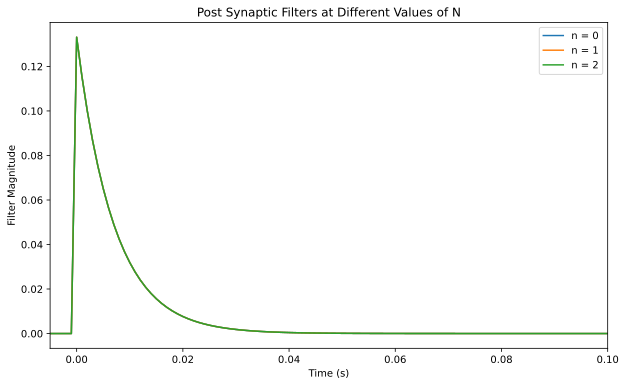

In [23]:
# ✍ Pretty unrelated to previous sections, onto post-synaptic filters 

def postSynapticFilter(n, tau, t):
    
    h = np.zeros(len(t))
    
    for i in range(len(t)):
        # Grabbing forumla for h(t) from notes
        if(t[i] < 0):
            h[i] = 0
        else:
            h[i] = np.power(t[i], n)*np.exp(-t[i]/tau)
        
    # normalize
    h = h/sum(h)
    
    return h


T = 1
dt = 0.001
ts = np.arange(-0.005,T,dt)

tau = 0.007
n = [0,1,2]

fig=plt.figure(figsize = (10,6))
ax=fig.add_subplot()
ax.title.set_text('Post Synaptic Filters at Different Values of N')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Filter Magnitude')
ax.set_xlim(-0.005, 0.1)
for i in range(len(n)):
    ht = postSynapticFilter(n[i], tau, ts)
    #alphs value so that graph is a little less cluttered looking
    ax.plot(ts,ht , label ="n = %s" % n[i])
    legend=ax.legend() 



**b) Discussion.** What two things do you expect increasing $n$ will do to $\hat{x}(t)$?

✍ Well so clearly increasing n smooths our our filter a bit and also shifts it's peak to the right of this time graph... In terms of the effects that will have on $|\hat{x}(t)|$, I believe that first and foremost this will cause a delay in when the spikes are registered, because of the time delay present in the above graph, which would in turn result in a slight delay in our post filter graph compared to our input. I guess I'd also expect the corners in our output signal to become less sharp? Because the impact input signal and spikes are now being averaged over a longer time frame? 

**c) Plotting the filter for different $\tau$.** Plot the normalized $h(t)$ for $\tau=2\,\mathrm{ms}$, $\tau=5\,\mathrm{ms}$, $\tau=10\,\mathrm{ms}$, $\tau=20\,\mathrm{ms}$ with $n = 0$.

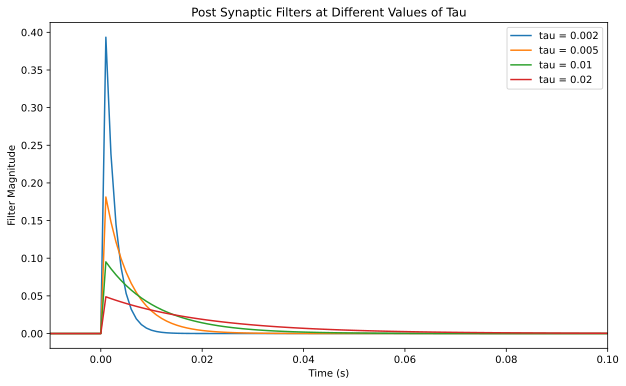

In [24]:
# ✍ 

T = 1
dt = 0.001
ts = np.arange(-0.01,T,dt)

tau = [0.002, 0.005, 0.01, 0.02]
n = 0

fig=plt.figure(figsize = (10,6))
ax=fig.add_subplot()
ax.title.set_text('Post Synaptic Filters at Different Values of Tau')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Filter Magnitude')
ax.set_xlim(-0.01, 0.1)
for i in range(len(tau)):
    ht = postSynapticFilter(n, tau[i], ts)
    #alphs value so that graph is a little less cluttered looking
    ax.plot(ts,ht, label ="tau = %s" % tau[i])
    legend=ax.legend() 



**d) Discussion.** What two things do you expect increasing $\tau$ will do to $\hat{x}(t)$?

✍ So once again I expect a bit of signal smoothing because higher values of tau level the filter curve out over a longer period of time. I am really unsure about a second thing honestly. Coming back to this having done some tests, it also seems like increasing tau causes the magnitude of xhat to shrink.

**e) Decoding a spike-train using the post-synaptic current filter.** Decode $\hat{x}(t)$ from the spikes generated in question 3c) using an $h(t)$ with $n=0$ and $\tau=7\,\mathrm{ms}$. Do this by generating the spikes, filtering them with $h(t)$, and using that as your activity matrix $A$ to compute your decoders. Plot the time and frequency plots for this $h(t)$. Plot the $x(t)$ signal, the spikes, and the decoded $\hat{x}(t)$ value.

221


C:\Users\ethan\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


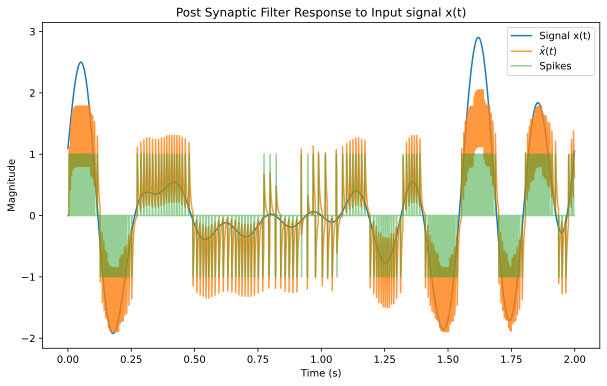

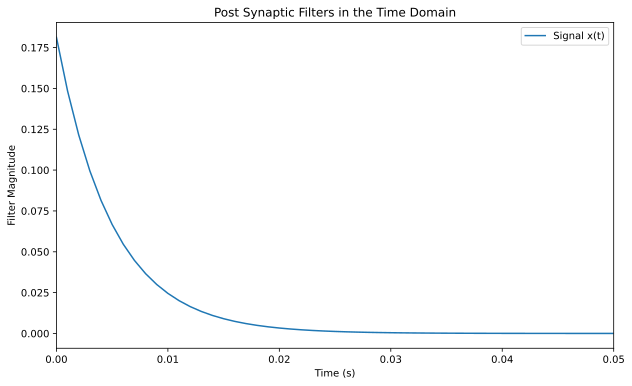

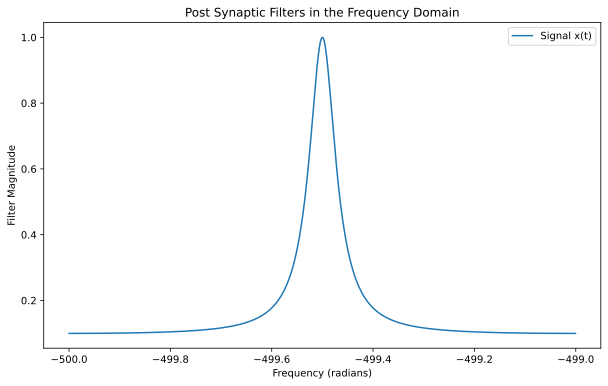

In [40]:
# ✍ 

#Function from assignment 1
def neuronDecoderWithNoise(A, xScale,stanDev = 0):
    Numsamples = len(xScale) 
    Atrans = np.transpose(A)
    Decoder = np.dot(np.linalg.inv(np.divide((np.dot(A,Atrans)),Numsamples)+(stanDev)**2*np.identity(len(A))), np.dot(A,xScale)/Numsamples)
    
    return Decoder

#Setting up my parameters and porting over question 3c

n = 0
tau = 0.005
numNeurons = 2

neuron1 = SpikingNeuronShell(40, 150, 1, 0.002, 0.02)
neuron2 = SpikingNeuronShell(40, 150, -1, 0.002, 0.02)
T = 2
dt = 0.001
limit = 5
rms =1
t = np.arange(0,T,dt)
f = np.arange(0,T,dt) / T - (T/dt) / (2.0 * T)
Xzeros = np.zeros(int(T/dt))
Xones = np.ones(int(T/dt))

sampleFrequencies, timeDomainSignal, frequencySignal = generateRandomSignal(limit, T, dt, rms)


voltages1 = neuron1.simulateSpikes(timeDomainSignal, dt)
voltages2 = neuron2.simulateSpikes(timeDomainSignal, dt)

numSpikes1 = 0
spikeTrain1 = np.zeros(len(voltages1))
for i in range(len(voltages1)):
    if (voltages1[i] >= 2):
        numSpikes1 += 1
        spikeTrain1[i] = 1
        
        
numSpikes2 = 0
spikeTrain2 = np.zeros(len(voltages2))
for i in range(len(voltages2)):
    if (voltages2[i] >= 2):
        numSpikes2 += 1
        spikeTrain2[i] = -1
        
spikeTrains = [spikeTrain1, spikeTrain2]
#just for the purpose of graphing 
spikeGraph = spikeTrain1 + spikeTrain2


print(numSpikes2 + numSpikes1)

ht = postSynapticFilter(n, tau, t)
#switching to frequency domain

HT = np.fft.fftshift(np.fft.fft(ht))

#Ohhhh myyy, this is far from the most efficient code I have ever written, but hey, it seems to work!!
postSynapticFilterSpikes = np.zeros([numNeurons, len(spikeGraph)])

for k in range(numNeurons):
    for i in range(len(spikeTrains[1])):
        if(spikeTrains[k][i] !=0 ):
            tempSpikeGraph = np.zeros(len(spikeGraph))
            for j in range(len(spikeTrains[1])):
                if j < i:
                    tempSpikeGraph[j] = 0
                else:
                    
                    tempSpikeGraph[j] = spikeTrains[k][i]*ht[j-i]

            postSynapticFilterSpikes[k] = np.add(postSynapticFilterSpikes[k], tempSpikeGraph)


decoder = neuronDecoderWithNoise(postSynapticFilterSpikes, t)

# I think I might sort of be cheating here by switching these back and forth... but I've got an unhandled negative that I 
# can't seem to figure out and this makes it work so idk 
postSynapticFilterSpikes[1] = abs(postSynapticFilterSpikes[1])

xhat = np.dot(decoder.transpose(), postSynapticFilterSpikes)


fig=plt.figure(figsize = (10,6))
ax=fig.add_subplot()
ax.title.set_text('Post Synaptic Filter Response to Input signal x(t)')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Magnitude')
ax.plot(t, timeDomainSignal, label ="Signal x(t)")
ax.plot(t,xhat, label ="$\hat{x}(t)$", alpha = 0.8)
ax.plot(t,spikeGraph, label ="Spikes", alpha = 0.5)
# ax.plot(t,postSynapticFilterSpikes[0], label ="Spikes", alpha = 0.5)
# ax.plot(t,postSynapticFilterSpikes[1], label ="Spikes", alpha = 0.5)
# ax.set_xlim(1.5,1.75)
legend=ax.legend() 


fig=plt.figure(figsize = (10,6))
ax=fig.add_subplot()
ax.title.set_text('Post Synaptic Filters in the Time Domain')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Filter Magnitude')
ax.plot(t, ht, label ="Signal x(t)")
ax.set_xlim(0,0.05)
legend=ax.legend() 


#Pretty sure this graph is incorrect but I cannot figure out why 
fig=plt.figure(figsize = (10,6))
ax=fig.add_subplot()
ax.title.set_text('Post Synaptic Filters in the Frequency Domain')
ax.set_xlabel('Frequency (radians)')
ax.set_ylabel('Filter Magnitude')
ax.plot(f, HT, label ="Signal x(t)")
legend=ax.legend() 


**f) Deocding a spike-train representing a low-frequency signal.** Use the same decoder and $h(t)$ as in part e), but generate a new $x(t)$ with $\mathtt{limit}=2\,\mathrm{Hz}$. Plot the $x(t)$ signal, the spikes, and the decoded $\hat{x}(t)$ value.

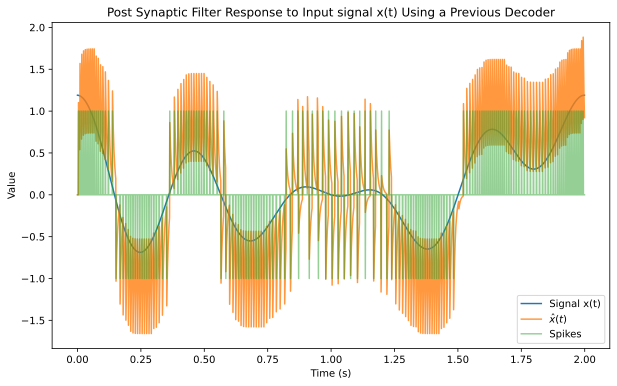

In [21]:
# ✍ 
n = 0
tau = 0.007
numNeurons = 2

neuron1 = SpikingNeuronShell(40, 150, 1, 0.002, 0.02)
neuron2 = SpikingNeuronShell(40, 150, -1, 0.002, 0.02)
T = 2
dt = 0.001
limit = 2
rms =0.5
t = np.arange(0,T,dt)
Xzeros = np.zeros(int(T/dt))
Xones = np.ones(int(T/dt))

sampleFrequencies, timeDomainSignal, frequencySignal = generateRandomSignal(limit, T, dt, rms)


voltages1 = neuron1.simulateSpikes(timeDomainSignal, dt)
voltages2 = neuron2.simulateSpikes(timeDomainSignal, dt)

numSpikes1 = 0
spikeTrain1 = np.zeros(len(voltages1))
for i in range(len(voltages1)):
    if (voltages1[i] >= 2):
        numSpikes1 += 1
        spikeTrain1[i] = 1
        
        
numSpikes2 = 0
spikeTrain2 = np.zeros(len(voltages2))
for i in range(len(voltages2)):
    if (voltages2[i] >= 2):
        numSpikes2 += 1
        spikeTrain2[i] = -1
        
spikeTrains = [spikeTrain1, spikeTrain2]
#just for the purpose of graphing 
spikeGraph = spikeTrain1 + spikeTrain2

postSynapticFilterSpikes = np.zeros([numNeurons, len(spikeGraph)])

for k in range(numNeurons):
    for i in range(len(spikeTrains[1])):
        if(spikeTrains[k][i] !=0 ):
            tempSpikeGraph = np.zeros(len(spikeGraph))
            for j in range(len(spikeTrains[1])):
                if j < i:
                    tempSpikeGraph[j] = 0
                else:
                    
                    tempSpikeGraph[j] = spikeTrains[k][i]*ht[j-i]

            postSynapticFilterSpikes[k] = np.add(postSynapticFilterSpikes[k], tempSpikeGraph)
            
#use decoder from previous question            
#decoder = neuronDecoderWithNoise(postSynapticFilterSpikes, t)

postSynapticFilterSpikes[1] = abs(postSynapticFilterSpikes[1])
            
xhat = np.dot(decoder.transpose(), postSynapticFilterSpikes)


fig=plt.figure(figsize = (10,6))
ax=fig.add_subplot()
ax.title.set_text('Post Synaptic Filter Response to Input signal x(t) Using a Previous Decoder')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Value')
ax.plot(t, timeDomainSignal, label ="Signal x(t)")
ax.plot(t,xhat, label ="$\hat{x}(t)$", alpha = 0.8)
ax.plot(t,spikeGraph, label ="Spikes", alpha = 0.5)
legend=ax.legend() 



**g) Discussion.** How do the decodings from e) and f) compare? Explain.

✍ So it's pretty easy to see that the decoded signal from e is more accurate. That obviously makes sense given that the decoder itself was trained using e, so obviously it would do a worse job on other signals. It seems like it over estimates the magnitude of the signal in f quite often, but does an otherwise pretty faithful job of recreating the signal. Interestingly when you let this signal be used to generate it's own decoder, xhat still overestimates the function a fair bit. Though I'd need more neuron examples to confirm, we can probably conclude from this that the filter's magnitude lowering properties have a larger impact on high frequency signals